<a href="https://colab.research.google.com/github/Eman304/Eman-ALashkar/blob/main/UNI_AI_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary libraries

In [ ]:
import pandas as pd
import re  #regular expression
import nltk # library for tokenization & removing stop words
nltk.download('punkt_tab') # pretrained tokenizer model
from nltk.tokenize import word_tokenize # Splits text into words
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer # return the word to its origin
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences #standardize the lengths of sequences for NN
import tensorflow as tf
# Download the necessary datasets
nltk.download('punkt')  # For word_tokenize
nltk.download('stopwords')  # For stopwords
nltk.download('wordnet') #database of English words

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install datasets

# Dataset 4

## Load the dataset

In [ ]:
dataset4_train = pd.read_csv("/content/twitter_training.csv")
dataset4_test = pd.read_csv("/content/twitter_test.csv")

In [ ]:
dataset4_train.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
dataset4_test.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


## Add headers for columns

In [ ]:
dataset4_train.columns = ['Header1', 'company','label','text']
dataset4_test.columns = ['Header1', 'company','label','text']

In [ ]:
dataset4_train.head()

,Header1,company,label,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
dataset4_test.head()

,Header1,company,label,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


## Delete unneeded columns

In [ ]:
dataset4_train.drop(columns=["Header1","company"],inplace=True)
dataset4_test.drop(columns=["Header1","company"],inplace=True)

In [ ]:
dataset4_train.head()

,label,text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [ ]:
dataset4_test.head()

,label,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [ ]:
dataset4_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24003 entries, 0 to 24002
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   24003 non-null  object
 1   text    23783 non-null  object
dtypes: object(2)
memory usage: 375.2+ KB


In [ ]:
dataset4_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   999 non-null    object
 1   text    999 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB


In [ ]:
dataset4_train.label.value_counts()

,count
label,
Positive,7277
Neutral,6166
Negative,6156
Irrelevant,4404


In [ ]:
dataset4_test.label.value_counts()

,count
label,
Neutral,285
Positive,277
Negative,266
Irrelevant,171


## Add the two in one dataframe

In [ ]:
sentiment=pd.concat([dataset4_train,dataset4_test],ignore_index=True)
sentiment

,label,text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...
...,...,...
24997,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
24998,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
24999,Positive,Today sucked so it’s time to drink wine n play...
25000,Positive,Bought a fraction of Microsoft today. Small wins.


## Check for cleaning data

In [ ]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25002 entries, 0 to 25001
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   25002 non-null  object
 1   text    24782 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


In [ ]:
sentiment.isnull().sum()

,0
label,0
text,220


In [ ]:
sentiment.dropna(inplace=True)
sentiment.isnull().sum()

,0
label,0
text,0


In [ ]:
sentiment.duplicated().sum()

np.int64(1456)

In [ ]:
sentiment.drop_duplicates(inplace=True)
sentiment.duplicated().sum()

np.int64(0)

In [ ]:
sentiment.label.value_counts()

,count
label,
Positive,6996
Neutral,6043
Negative,6018
Irrelevant,4269


## EDA

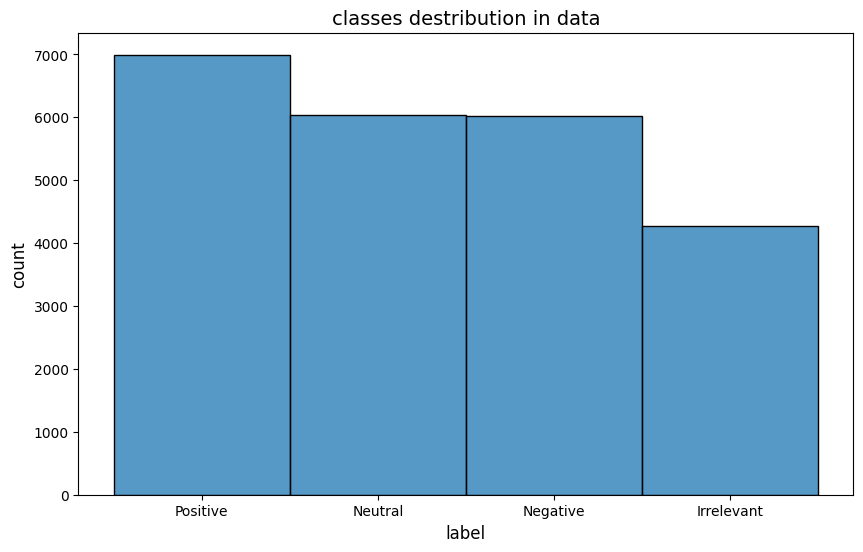

In [ ]:
# figure for class distribution
plt.figure(figsize=(10, 6))
sns.histplot(data = sentiment, x = 'label', bins = 4)


plt.title('classes destribution in data' , fontsize=14)
plt.xlabel('label', fontsize=12)
plt.ylabel('count', fontsize=12)


plt.show()

## preprocessing the text

In [ ]:
# function for cleaning the text
def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I) # Remove extra white space from text

    text = re.sub(r'\W', ' ', str(text)) # Remove all the special characters from text

    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # Remove all single characters from text

    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove any character that isn't alphabetical

    text = text.lower()

    words = word_tokenize(text)

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    stop_words = set(stopwords.words("english"))
    Words = [word for word in words if word not in stop_words]

    Words = [word for word in Words if len(word) >= 3]

    indices = np.unique(Words, return_index=True)[1]
    cleaned_text = np.array(Words)[np.sort(indices)].tolist()

    return cleaned_text

In [ ]:
x=sentiment.drop('label',axis=1)
y=sentiment.label

In [ ]:
texts=list(x['text'])

In [ ]:
cleaned_text = [process_text(text) for text in texts]

In [ ]:
print(cleaned_text[:10])

[['coming', 'border', 'kill'], ['getting', 'borderland', 'kill'], ['coming', 'borderland', 'murder'], ['getting', 'borderland', 'murder'], ['getting', 'borderland', 'murder'], ['spent', 'hour', 'making', 'something', 'fun', 'know', 'huge', 'borderland', 'fan', 'maya', 'one', 'favorite', 'character', 'decided', 'make', 'wallpaper', 'original', 'image', 'versus', 'creation', 'made', 'enjoy', 'pic', 'twitter', 'com', 'mlsiwfjg'], ['spent', 'couple', 'hour', 'something', 'fun', 'know', 'huge', 'borderland', 'fan', 'maya', 'one', 'favorite', 'character', 'decided', 'make', 'wallpaper', 'original', 'picture', 'compared', 'creation', 'made', 'pic', 'twitter', 'com', 'mlsiwfjg'], ['spent', 'hour', 'something', 'fun', 'know', 'huge', 'borderland', 'fan', 'maya', 'one', 'favorite', 'character'], ['spent', 'hour', 'making', 'something', 'fun', 'know', 'huge', 'rhandlerr', 'fan', 'maya', 'one', 'favorite', 'character', 'decided', 'make', 'wallpaper', 'original', 'image', 'versus', 'creation', 'mad

In [ ]:
x_temp, x_test, y_temp, y_test = train_test_split(cleaned_text, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.2, random_state=42)

## prepare the data to the model

In [ ]:
max_vocab = 20000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(x_train)
word_idx = tokenizer.word_index  # Corrected syntax for accessing word index
v = len(word_idx)
print("the size of vocab =", v)  # Corrected spacing
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)
x_val = tokenizer.texts_to_sequences(x_val)

the size of vocab = 12297


In [ ]:
maxlen = 100
x_train = pad_sequences(x_train,maxlen=maxlen)
x_test = pad_sequences(x_test,maxlen=maxlen)
x_val = pad_sequences(x_val,maxlen=maxlen)

## Build the LSTM model

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense,Input,GlobalMaxPooling1D,Dropout,Bidirectional
from tensorflow.keras.models import Model
from keras import optimizers
import numpy as np
D=100
inputt=Input(shape=(maxlen,))

In [ ]:
from tensorflow.keras.optimizers import Adam
learning_rate = 0.0001  # Set your desired learning rate here
x=Embedding(v+1,D)(inputt)
x = Dropout(0.5)(x)
x = LSTM(150)(x)
x = Dense(32, activation='relu')(x)
x = Dense(4, activation='softmax')(x)

model1 = Model(inputt, x)

# Define optimizer with specified learning rate
optimizer = Adam(learning_rate=learning_rate)

model1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_val_encoded = label_encoder.transform(y_val)

In [ ]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded)
y_val_one_hot = tf.keras.utils.to_categorical(y_val_encoded)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history = model1.fit(x_train, y_train_one_hot, epochs=70, validation_data=(x_val, y_val_one_hot), callbacks= [early_stopping])

Epoch 1/70
467/467 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.3127 - loss: 1.3664 - val_accuracy: 0.3510 - val_loss: 1.3363
Epoch 2/70
467/467 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.4144 - loss: 1.2874 - val_accuracy: 0.5402 - val_loss: 1.0960
Epoch 3/70
467/467 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.5992 - loss: 0.9877 - val_accuracy: 0.6342 - val_loss: 0.9040
Epoch 4/70
467/467 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6876 - loss: 0.7977 - val_accuracy: 0.7047 - val_loss: 0.7875
Epoch 5/70
467/467 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7512 - loss: 0.6616 - val_accuracy: 0.7462 - val_loss: 0.6970
Epoch 6/70
467/467 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8059 - loss: 0.5410 - val_accuracy: 0.7588 - val_loss: 0.6418
Epoch 7/70
467/467 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8374 - loss: 0.4586 - val_accuracy: 0.7945 - val_loss: 0.5640
Epoch 8/70
467/467 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8633 - loss: 0.3897 - val_accuracy

In [ ]:
model1.save('model4.h5')

In [ ]:
from google.colab import files
model1.save('model4.keras')
files.download("model4.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

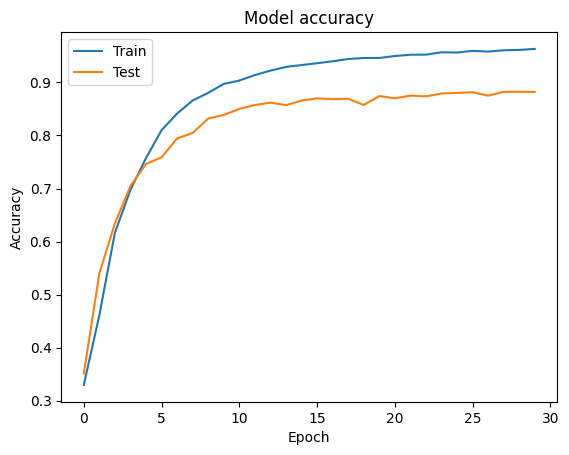

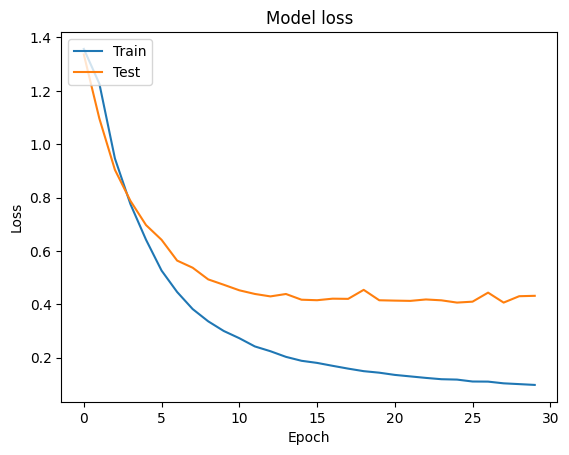

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
# Evaluate the model on the test data
loss, accuracy = model1.evaluate(x_test, y_test_one_hot)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8905 - loss: 0.3611
Test Loss: 0.38360103964805603
Test Accuracy: 0.8849121332168579


In [ ]:
from sklearn.metrics import classification_report
y_pred_probs = model1.predict(x_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)
print(classification_report(y_true_labels, y_pred_labels, target_names = ['Irrelevant', 'Negative', 'Neutral', 'Positive' ]))

146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

  Irrelevant       0.87      0.86      0.86       864
    Negative       0.91      0.87      0.89      1202
     Neutral       0.92      0.88      0.90      1230
    Positive       0.84      0.92      0.88      1370

    accuracy                           0.88      4666
   macro avg       0.89      0.88      0.88      4666
weighted avg       0.89      0.88      0.89      4666



146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


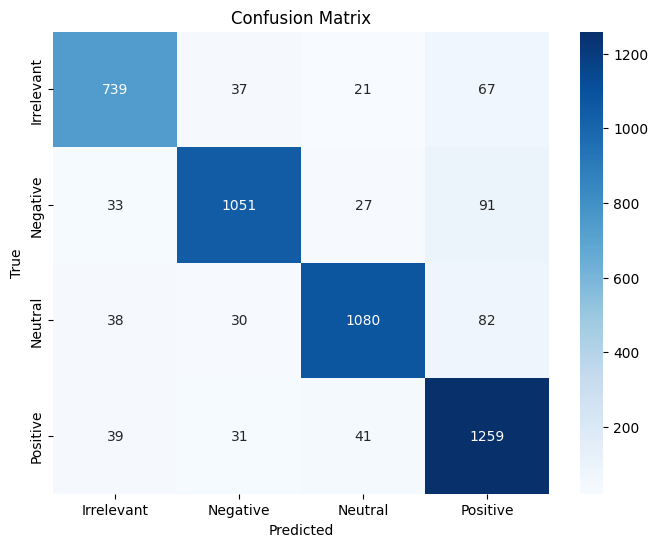

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


y_pred_probs = model1.predict(x_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Irrelevant', 'Negative', 'Neutral', 'Positive'],
            yticklabels=['Irrelevant', 'Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
y_true_labels

array([2, 0, 2, ..., 3, 0, 1])

In [ ]:
y_test

,label
12936,Neutral
8749,Irrelevant
944,Neutral
22006,Irrelevant
5061,Irrelevant
...,...
16099,Irrelevant
7855,Irrelevant
2494,Positive
12927,Irrelevant


0 ------> Irrelevant       
1 ------> Negative                                                       
2 ------> Neutral                                           
3 ------> Positive

############################################

# DATASET 3

## Load the data

In [ ]:
import pandas as pd

# Login using e.g. `huggingface-cli login` to access this dataset
splits = {'train': 'data/train-00000-of-00001.parquet', 'validation': 'data/validation-00000-of-00001.parquet', 'test': 'data/test-00000-of-00001.parquet'}
dataset3_train = pd.read_parquet("hf://datasets/waseemrazakhan/sentiment-balanced-v1/" + splits["train"])
dataset3_valid = pd.read_parquet("hf://datasets/waseemrazakhan/sentiment-balanced-v1/" + splits["validation"])
dataset3_test = pd.read_parquet("hf://datasets/waseemrazakhan/sentiment-balanced-v1/" + splits["test"])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


## Check for clean data

In [ ]:
dataset3_train.head()

,text,label
0,I use this moisturizer am and pm and it lasted...,1
1,Purchase this phone try to activate and was im...,0
2,"-Update-Video play backI have gotten the ""fix""...",0
3,I have been using the laptop for a little over...,1
4,"Fits perfectly, and really works.",1


In [ ]:
dataset3_valid.head()

,text,label
0,Camera is awful on this,0
1,Bought this as a replacement for my husband (h...,1
2,First day I was obsessed but now I’m not. I ha...,0
3,I bought my very first computer in 1987 — a Co...,1
4,Pretty delicate necklace. Many compliments. S...,1


In [ ]:
dataset3_test.head()

,text,label
0,A little suspicious that this was potentially ...,0
1,I am not usually a fake gold person but let me...,1
2,These are thick. The packaging is great. There...,0
3,"This was an upgrade from the Oneplus 10T, firs...",1
4,Replaced filter according to manual (have done...,0


In [ ]:
dataset3_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20744 entries, 0 to 20743
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20744 non-null  object
 1   label   20744 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 324.3+ KB


In [ ]:
dataset3_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2593 entries, 0 to 2592
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2593 non-null   object
 1   label   2593 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 40.6+ KB


In [ ]:
dataset3_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2593 entries, 0 to 2592
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2593 non-null   object
 1   label   2593 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 40.6+ KB


In [ ]:
dataset3_train.label.value_counts()

,count
label,
1,10372
0,10372


In [ ]:
dataset3_valid.label.value_counts()

,count
label,
1,1297
0,1296


In [ ]:
dataset3_test.label.value_counts()

,count
label,
0,1297
1,1296


In [ ]:
dataset3_train.isnull().sum()

,0
text,0
label,0


In [ ]:
dataset3_valid.isnull().sum()

,0
text,0
label,0


In [ ]:
dataset3_test.isnull().sum()

,0
text,0
label,0


In [ ]:
dataset3_train.duplicated().sum()

np.int64(4378)

In [ ]:
dataset3_train.drop_duplicates(inplace = True)
dataset3_train.duplicated().sum()

np.int64(0)

In [ ]:
dataset3_valid.duplicated().sum()

np.int64(99)

In [ ]:
dataset3_valid.drop_duplicates(inplace = True)
dataset3_valid.duplicated().sum()

np.int64(0)

In [ ]:
dataset3_test.duplicated().sum()

np.int64(99)

In [ ]:
dataset3_test.drop_duplicates(inplace = True)
dataset3_test.duplicated().sum()

np.int64(0)

In [ ]:
dataset3_train.label.value_counts()

,count
label,
1,9997
0,6369


In [ ]:
dataset3_valid.label.value_counts()

,count
label,
1,1284
0,1210


In [ ]:
dataset3_test.label.value_counts()

,count
label,
1,1278
0,1216


## EDA

Class distribution for train data

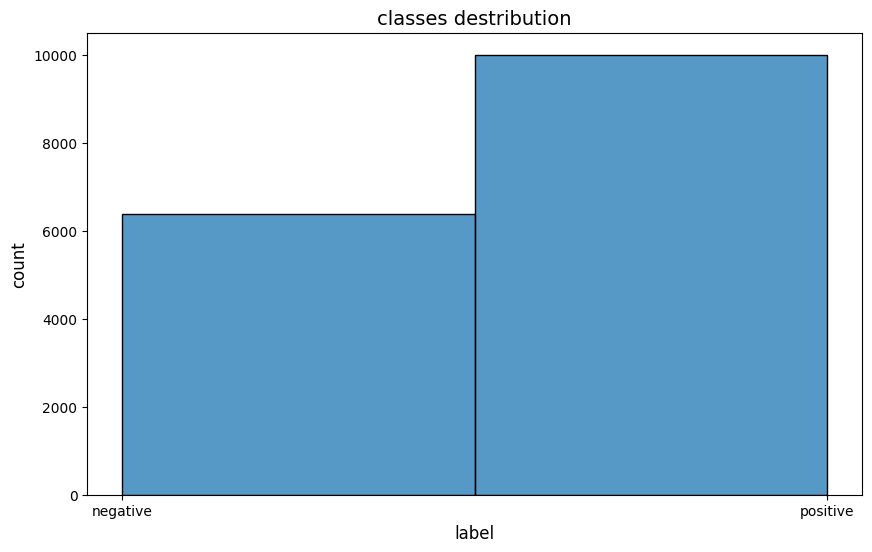

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset3_train, x='label', bins = 2)
plt.xticks(ticks=[0, 1], labels=['negative', 'positive'])


plt.title('classes destribution' , fontsize=14)
plt.xlabel('label', fontsize=12)
plt.ylabel('count', fontsize=12)


plt.show()

Class distribution for validation data

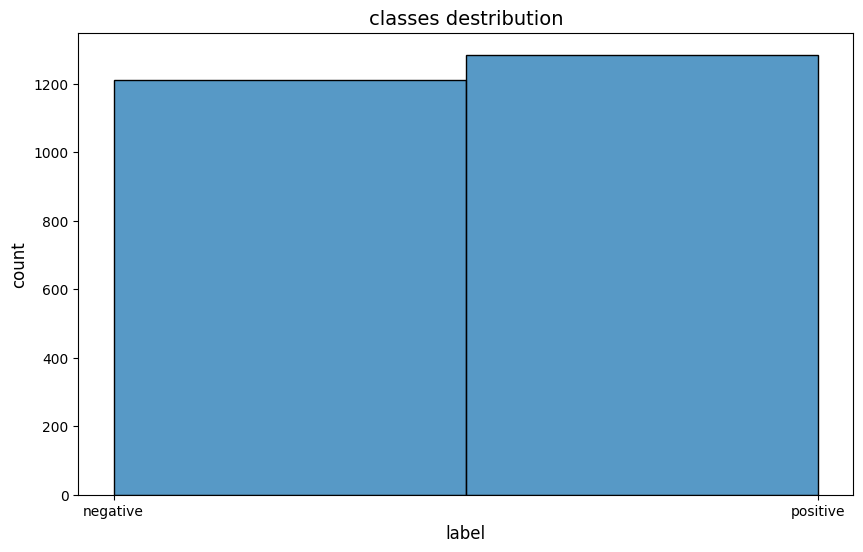

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset3_valid, x='label', bins = 2)
plt.xticks(ticks=[0, 1], labels=['negative', 'positive'])


plt.title('classes destribution' , fontsize=14)
plt.xlabel('label', fontsize=12)
plt.ylabel('count', fontsize=12)


plt.show()

Class distribution for test data

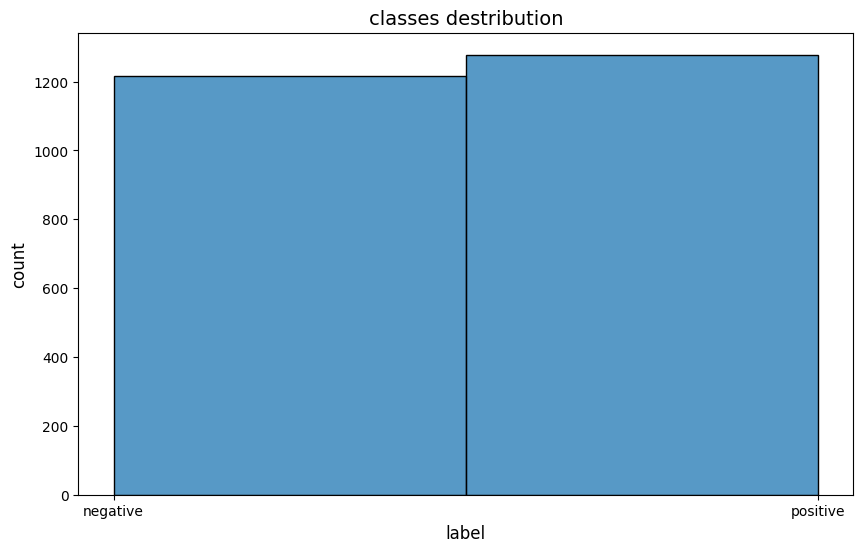

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset3_test, x='label', bins = 2)
plt.xticks(ticks=[0, 1], labels=['negative', 'positive'])


plt.title('classes destribution' , fontsize=14)
plt.xlabel('label', fontsize=12)
plt.ylabel('count', fontsize=12)


plt.show()

## Preprocessing the text in the data

In [ ]:
def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I) # Remove extra white space from text

    text = re.sub(r'\W', ' ', str(text)) # Remove all the special characters from text

    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # Remove all single characters from text

    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove any character that isn't alphabetical

    text = text.lower()

    words = word_tokenize(text)

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    stop_words = set(stopwords.words("english"))
    Words = [word for word in words if word not in stop_words]

    Words = [word for word in Words if len(word) >= 3]

    indices = np.unique(Words, return_index=True)[1]  #Sites of the first appearance of unique words in Words
    cleaned_text = np.array(Words)[np.sort(indices)].tolist()  # List of unique words sorted by first appearance

    return cleaned_text

In [ ]:
x_tr = dataset3_train.drop('label', axis =1)
y_tr = dataset3_train['label']

x_v = dataset3_valid.drop('label', axis =1)
y_v = dataset3_valid['label']

x_st = dataset3_test.drop('label', axis =1)
y_st = dataset3_test['label']

In [ ]:
texts_tr =list(x_tr['text'])

texts_v =list(x_v['text'])

texts_st =list(x_st['text'])

In [ ]:
cleaned_text_tr = [process_text(text) for text in texts_tr]

cleaned_text_v = [process_text(text) for text in texts_v]

cleaned_text_st = [process_text(text) for text in texts_st]

In [ ]:
print(cleaned_text_tr[:10])

print(cleaned_text_v[:10])

print(cleaned_text_st[:10])

[['use', 'moisturizer', 'lasted', 'month', 'however', 'cut', 'half', 'look', 'photo', 'see', 'much', 'product', 'still', 'inside', 'hoping', 'last', 'another', 'really', 'dry', 'skin', 'doe', 'trick', 'crazy', 'acne', 'problem', 'issue', 'pilling'], ['purchase', 'phone', 'try', 'activate', 'impossible', 'customer', 'service', 'rather', 'worse', 'part'], ['update', 'video', 'play', 'backi', 'gotten', 'fix', 'motorola', 'lenovo', 'forum', 'fixed', 'flickering', 'issue', 'still', 'another', 'hdr', 'saturation', 'color', 'yet', 'google', 'camerai', 'also', 'call', 'time', 'phone', 'camera', 'really', 'better', 'stylus', 'pixel', 'blurrier', 'full', 'grain', 'added', 'boost', 'plenty', 'selling', 'point', 'megapixel', 'hype', 'quality', 'applies', 'recording', 'original', 'edge', 'seemed', 'like', 'amazing', 'deal', 'compared', 'others', 'market', 'introductory', 'price', 'writing', 'review', 'however', 'ultra', 'smooth', 'refresh', 'rate', 'screen', 'advertising', 'back', 'without', 'strea

In [ ]:
length = []
for i in range(len(cleaned_text_tr)):
  length.append(len(cleaned_text_tr[i]))

ds = pd.Series(length)
ds.value_counts()

,count
4,914
5,755
6,730
3,711
7,680
...,...
253,1
259,1
210,1
176,1


<Axes: ylabel='Count'>

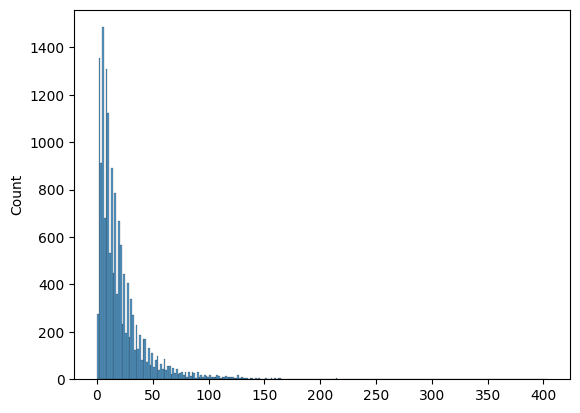

In [ ]:
sns.histplot(data = ds)

In [ ]:
x_train = cleaned_text_tr
y_train = y_tr

x_val = cleaned_text_v
y_val = y_v

x_test = cleaned_text_st
y_test = y_st

## Prepare the data to the model

In [ ]:
# convert words to sequence of numbers
max_vocab = 20000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(x_train)  # makes dictionary of the words and its number
word_idx = tokenizer.word_index  # Corrected syntax for accessing word index
v = len(word_idx) # may be greater than max_vocab
print("the size of vocab =", v)  # Corrected spacing
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)
x_val = tokenizer.texts_to_sequences(x_val)

the size of vocab = 19549


In [ ]:
# padding (make all sequences with the same length)
maxlen = 50
x_train = pad_sequences(x_train,maxlen=maxlen)
x_test = pad_sequences(x_test,maxlen=maxlen)
x_val = pad_sequences(x_val,maxlen=maxlen)


In [ ]:
y_train.value_counts()

,count
label,
1,9997
0,6369


## Build LSTM model

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense,Input,Dropout
from tensorflow.keras.models import Model
from keras import optimizers
import numpy as np
D=100 # make each word 100 (dimention)
inputt=Input(shape=(maxlen,))

In [ ]:
from tensorflow.keras.optimizers import Adam
learning_rate = 0.0001  # Set desired learning rate here
x=Embedding(v+1,D)(inputt) # each word will be a vector of 50 numbers
x = Dropout(0.5)(x)
x = LSTM(150)(x)
x = Dense(32, activation='relu')(x)
x = Dense(2, activation='softmax')(x) # out

model3 = Model(inputt, x)

# Define optimizer with specified learning rate
optimizer = Adam(learning_rate=learning_rate)

model3.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# weights for unbalanced classes
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.array([0, 1])
class_weights = compute_class_weight('balanced', classes=classes, y= y_train)
class_weight_dict = dict(zip(classes, class_weights))

In [ ]:
class_weight_dict

{np.int64(0): np.float64(1.284817082744544),
 np.int64(1): np.float64(0.8185455636691007)}

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history = model3.fit(x_train, y_train, epochs=70, validation_data=(x_val, y_val), class_weight=class_weight_dict, callbacks=[early_stopping] )
model3.save('model3.h5')

Epoch 1/70
512/512 ━━━━━━━━━━━━━━━━━━━━ 60s 111ms/step - accuracy: 0.6131 - loss: 0.6662 - val_accuracy: 0.8228 - val_loss: 0.4120
Epoch 2/70
512/512 ━━━━━━━━━━━━━━━━━━━━ 85s 117ms/step - accuracy: 0.8355 - loss: 0.3899 - val_accuracy: 0.8484 - val_loss: 0.3451
Epoch 3/70
512/512 ━━━━━━━━━━━━━━━━━━━━ 81s 116ms/step - accuracy: 0.8768 - loss: 0.3039 - val_accuracy: 0.8677 - val_loss: 0.3206
Epoch 4/70
512/512 ━━━━━━━━━━━━━━━━━━━━ 81s 114ms/step - accuracy: 0.8918 - loss: 0.2623 - val_accuracy: 0.8749 - val_loss: 0.3060
Epoch 5/70
512/512 ━━━━━━━━━━━━━━━━━━━━ 83s 116ms/step - accuracy: 0.9059 - loss: 0.2380 - val_accuracy: 0.8913 - val_loss: 0.2868
Epoch 6/70
512/512 ━━━━━━━━━━━━━━━━━━━━ 79s 111ms/step - accuracy: 0.9158 - loss: 0.2126 - val_accuracy: 0.8901 - val_loss: 0.2895
Epoch 7/70
512/512 ━━━━━━━━━━━━━━━━━━━━ 59s 115ms/step - accuracy: 0.9251 - loss: 0.1938 - val_accuracy: 0.8921 - val_loss: 0.2811
Epoch 8/70
512/512 ━━━━━━━━━━━━━━━━━━━━ 59s 115ms/step - accuracy: 0.9315 - loss: 0

In [ ]:
from google.colab import files
model3.save('model3.keras')
files.download("model3.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

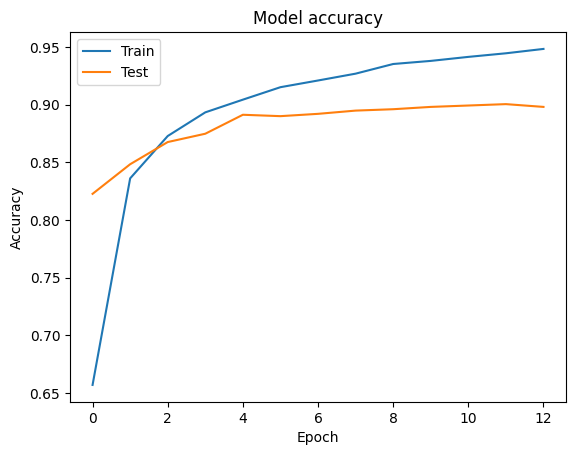

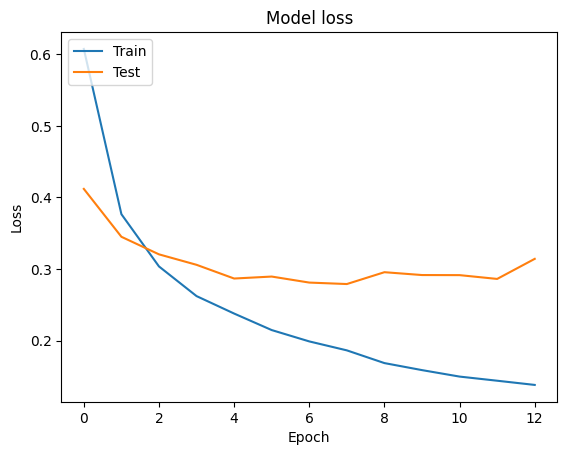

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model3.evaluate(x_test, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9095 - loss: 0.2424
Test Loss: 0.2501142919063568
Test Accuracy: 0.904570996761322


In [ ]:
from sklearn.metrics import classification_report
y_pred = model3.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes, target_names=['Negative', 'Positive']))

78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step
              precision    recall  f1-score   support

    Negative       0.89      0.92      0.90      1216
    Positive       0.92      0.89      0.90      1278

    accuracy                           0.90      2494
   macro avg       0.90      0.91      0.90      2494
weighted avg       0.91      0.90      0.90      2494



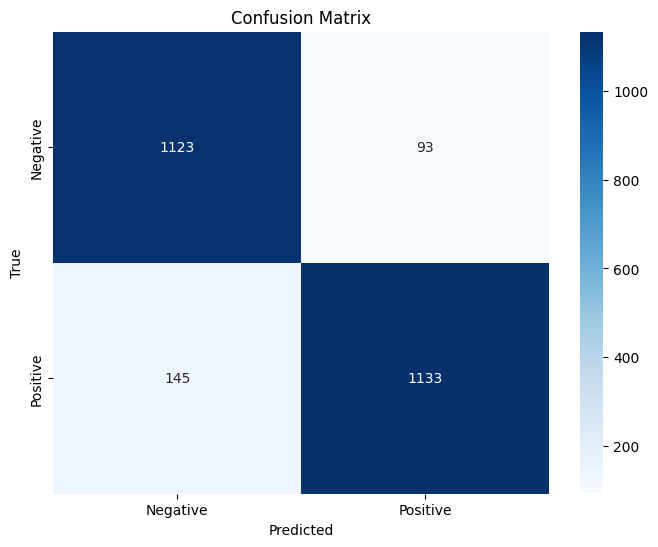

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


#y_pred = model.predict(X_test)
# y_pred_labels = np.argmax(y_pred_probs, axis=1)
# y_true_labels = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Dataset1

## Load the data

In [ ]:
import pandas as pd

# Login using e.g. `huggingface-cli login` to access this dataset
df = pd.read_parquet("hf://datasets/jhan21/amazon-reviews-balanced-text/data/train-00000-of-00001.parquet")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
dataset1 = df

## Drop unneeded columns

In [ ]:
dataset1.head()

,rating,title,text,__index_level_0__,sentiment,sentiment_text,tokens_text,nb_tokens_text
0,1,Not user friendly.,Wasn't impressed. Need very long hair for the ...,595866,-1,negative,"[Was, n't, impressed, ., Need, very, long, hai...",12
1,1,Shorter than expected,The description says this wig is 24” but it’s ...,551720,-1,negative,"[The, description, says, this, wig, is, 24, ”,...",23
2,1,One Star,I almost finished use my product when it arrived.,279320,-1,negative,"[I, almost, finished, use, my, product, when, ...",10
3,2,Didn't work for me,Doesn't work at all as advertised,658482,-1,negative,"[Does, n't, work, at, all, as, advertised]",7
4,1,DO NOT BUY!,The bars are way to short i didnt get all 20 b...,668873,-1,negative,"[The, bars, are, way, to, short, i, didnt, get...",45


In [ ]:
dataset1.describe()

,rating,__index_level_0__,sentiment,nb_tokens_text
count,167082.000000,167082.000000,167082.000000,167082.000000
mean,3.046223,350092.260758,0.000000,40.229432
std,1.486488,202476.785053,0.816499,55.989568
min,1.000000,7.000000,-1.000000,0.000000
25%,2.000000,174983.750000,-1.000000,11.000000
50%,3.000000,350204.500000,0.000000,25.000000
75%,5.000000,524576.000000,1.000000,49.000000
max,5.000000,701518.000000,1.000000,3098.000000


In [ ]:
dataset1.drop(columns = ['title', '__index_level_0__', 'sentiment', 'tokens_text', 'nb_tokens_text' ],
             inplace = True)

In [ ]:
dataset1.head()

,rating,text,sentiment_text
0,1,Wasn't impressed. Need very long hair for the ...,negative
1,1,The description says this wig is 24” but it’s ...,negative
2,1,I almost finished use my product when it arrived.,negative
3,2,Doesn't work at all as advertised,negative
4,1,The bars are way to short i didnt get all 20 b...,negative


 5+4 ----> positive    ,       
 3 ------> neutral    ,          
 1 +2 ----> negative




In [ ]:
dataset1.rating.value_counts()

,count
rating,
3,55694
5,46888
1,39165
2,16529
4,8806


In [ ]:
dataset1['sentiment_text'].value_counts()

,count
sentiment_text,
negative,55694
neutral,55694
positive,55694


In [ ]:

def label_sentiment(rating):
    if rating in [1, 2]:
        return 0  # negative
    elif rating == 3:
        return 1  # neutral
    else:
        return 2  # positive

dataset1['label'] = dataset1['rating'].apply(label_sentiment)

In [ ]:
dataset1.head()

,rating,text,sentiment_text,label
0,1,Wasn't impressed. Need very long hair for the ...,negative,0
1,1,The description says this wig is 24” but it’s ...,negative,0
2,1,I almost finished use my product when it arrived.,negative,0
3,2,Doesn't work at all as advertised,negative,0
4,1,The bars are way to short i didnt get all 20 b...,negative,0


In [ ]:
dataset1.drop(columns = ['rating', 'sentiment_text'], inplace = True)

## Check for cleaning data

In [ ]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167082 entries, 0 to 167081
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    167082 non-null  object
 1   label   167082 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.5+ MB


In [ ]:
dataset1.isnull().sum()

,0
text,0
label,0


In [ ]:
dataset1.duplicated().sum()

np.int64(5815)

In [ ]:
dataset1.drop_duplicates(inplace = True)

In [ ]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161267 entries, 0 to 167081
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    161267 non-null  object
 1   label   161267 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [ ]:
dataset1['label'].value_counts()

,count
label,
1,54628
0,54536
2,52103


In [ ]:
dataset1.head()

,text,label
0,Wasn't impressed. Need very long hair for the ...,0
1,The description says this wig is 24” but it’s ...,0
2,I almost finished use my product when it arrived.,0
3,Doesn't work at all as advertised,0
4,The bars are way to short i didnt get all 20 b...,0


## EDA

classes destribution

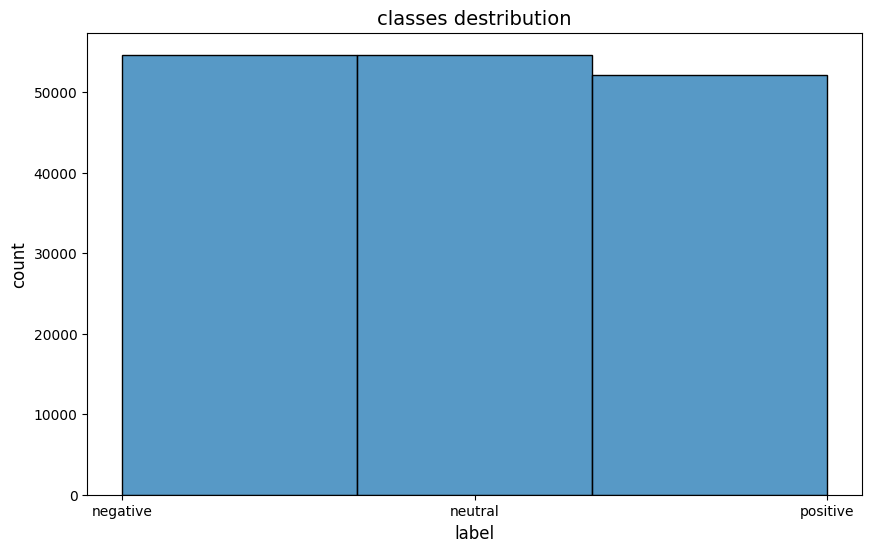

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset1, x='label', bins = 3)
plt.xticks(ticks=[0, 1, 2], labels=['negative', 'neutral', 'positive'])


plt.title('classes destribution' , fontsize=14)
plt.xlabel('label', fontsize=12)
plt.ylabel('count', fontsize=12)


plt.show()

## preprocessing the text in the data:

function for cleaning the text

In [ ]:
def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I) # Remove extra white space from text

    text = re.sub(r'\W', ' ', str(text)) # Remove all the special characters from text

    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # Remove all single characters from text

    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove any character that isn't alphabetical

    text = text.lower()

    words = word_tokenize(text)

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    stop_words = set(stopwords.words("english"))
    Words = [word for word in words if word not in stop_words]

    Words = [word for word in Words if len(word) >= 3]

    indices = np.unique(Words, return_index=True)[1]  #Sites of the first appearance of unique words in Words
    cleaned_text = np.array(Words)[np.sort(indices)].tolist()  # List of unique words sorted by first appearance

    return cleaned_text

In [ ]:
x = dataset1.drop('label', axis =1)
y = dataset1['label']

In [ ]:
texts=list(x['text'])

In [ ]:
cleaned_text = [process_text(text) for text in texts]

In [ ]:
print(cleaned_text[:10])

[['impressed', 'need', 'long', 'hair', 'full', 'benefit'], ['description', 'say', 'wig', 'even', 'close', 'barley'], ['almost', 'finished', 'use', 'product', 'arrived'], ['work', 'advertised'], ['bar', 'way', 'short', 'didnt', 'get', 'lip', 'started', 'bleed', 'next', 'morning', 'cut', 'blood', 'flow', 'ever', 'buy', 'tese', 'wast', 'money'], ['hair', 'quality', 'poor', 'within', 'week', 'getting', 'styled', 'looked', 'horrible', 'would', 'buy', 'wish', 'could', 'get', 'money', 'back'], ['suck', 'twist', 'tip', 'little', 'product'], ['hard', 'use', 'keep', 'place'], ['crimp', 'metal', 'kept', 'falling', 'acetone', 'destroy'], ['unhappy', 'product', 'look', 'picture', 'order', 'particular', 'item', 'gave', 'star', 'would', 'submit', 'review', 'without', 'given', 'least']]


In [ ]:
empty = []
for i in range(len(cleaned_text)):
  if cleaned_text[i] == []:
    empty.append(i)
#print(empty)
len(empty)


321

In [ ]:
length = []
for i in range(len(cleaned_text)):
  length.append(len(cleaned_text[i]))

ds = pd.Series(length)
ds.value_counts()

,count
4,10184
5,9666
6,9429
3,9375
7,8702
...,...
371,1
222,1
231,1
234,1


<Axes: ylabel='Count'>

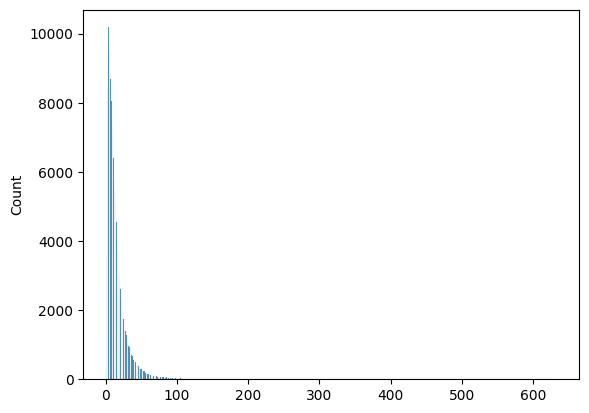

In [ ]:
sns.histplot(data = ds)

In [ ]:
x_temp, x_test, y_temp, y_test = train_test_split(cleaned_text, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.25, random_state=42)

## prepare the data to the model

In [ ]:
# convert words to sequence of numbers
max_vocab = 20000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(x_train)  # makes dictionary of the words and its number
word_idx = tokenizer.word_index  # Corrected syntax for accessing word index
v = len(word_idx) # may be greater than max_vocab
print("the size of vocab =", v)  # Corrected spacing
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)
x_val = tokenizer.texts_to_sequences(x_val)


the size of vocab = 31040


In [ ]:
# padding (make all sequences with the same length)
maxlen = 20
x_train = pad_sequences(x_train,maxlen=maxlen)
x_test = pad_sequences(x_test,maxlen=maxlen)
x_val = pad_sequences(x_val,maxlen=maxlen)


In [ ]:
dataset1['label'].value_counts()

,count
label,
1,54628
0,54536
2,52103


In [ ]:
y.value_counts()

,count
label,
1,54628
0,54536
2,52103


## Build LSTM model

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense,Input,Dropout
from tensorflow.keras.models import Model
from keras import optimizers
import numpy as np
D=50
inputt=Input(shape=(maxlen,))

In [ ]:
from tensorflow.keras.optimizers import Adam
learning_rate = 0.0005  # Set desired learning rate here
x=Embedding(v+1,D)(inputt) # each word will be a vector of 50 numbers
x = Dropout(0.3)(x)
x = LSTM(4)(x)
#x = Dense(16, activation='relu')(x)
x = Dense(3, activation='softmax')(x) # out

model = Model(inputt, x)

# Define optimizer with specified learning rate
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


weights for unbalanced classes

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.array([0, 1, 2])
class_weights = compute_class_weight('balanced', classes=classes, y=dataset1['label'])
class_weight_dict = dict(zip(classes, class_weights))

In [ ]:
class_weight_dict

{np.int64(0): np.float64(0.9856914087330693),
 np.int64(1): np.float64(0.9840313880549657),
 np.int64(2): np.float64(1.0317192228214627)}

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), class_weight=class_weight_dict, callbacks=[early_stopping] )
model.save('model1.h5')

Epoch 1/20
3024/3024 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6637 - loss: 0.7429 - val_accuracy: 0.6615 - val_loss: 0.7502
Epoch 2/20
3024/3024 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.7015 - loss: 0.6836 - val_accuracy: 0.6640 - val_loss: 0.7491
Epoch 3/20
3024/3024 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - accuracy: 0.7193 - loss: 0.6561 - val_accuracy: 0.6661 - val_loss: 0.7512
Epoch 4/20
3024/3024 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7306 - loss: 0.6310 - val_accuracy: 0.6653 - val_loss: 0.7549
Epoch 5/20
3024/3024 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7378 - loss: 0.6182 - val_accuracy: 0.6627 - val_loss: 0.7634


In [ ]:
from google.colab import files
model.save('model1.keras')
files.download("model1.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

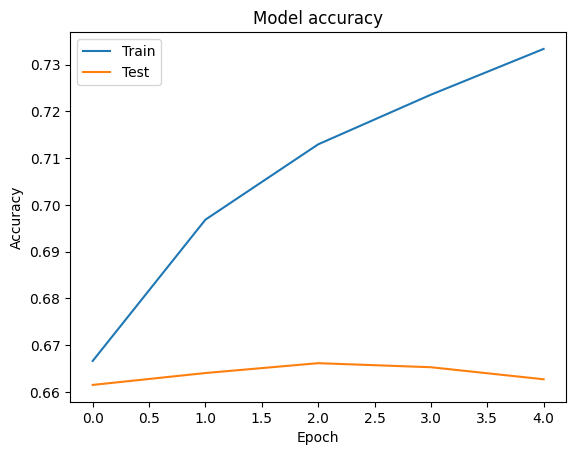

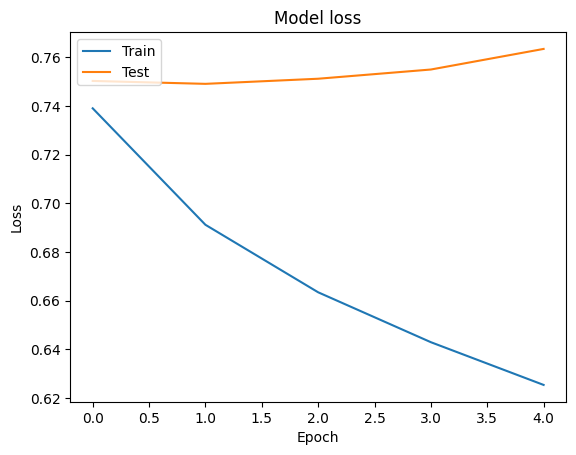

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


1008/1008 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6670 - loss: 0.7459
Test Loss: 0.7450771927833557
Test Accuracy: 0.6692813038825989


In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes, target_names=['Negative', 'Neutral', 'Positive']))

1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

    Negative       0.67      0.72      0.70     10754
     Neutral       0.58      0.57      0.57     10934
    Positive       0.77      0.72      0.74     10566

    accuracy                           0.67     32254
   macro avg       0.67      0.67      0.67     32254
weighted avg       0.67      0.67      0.67     32254



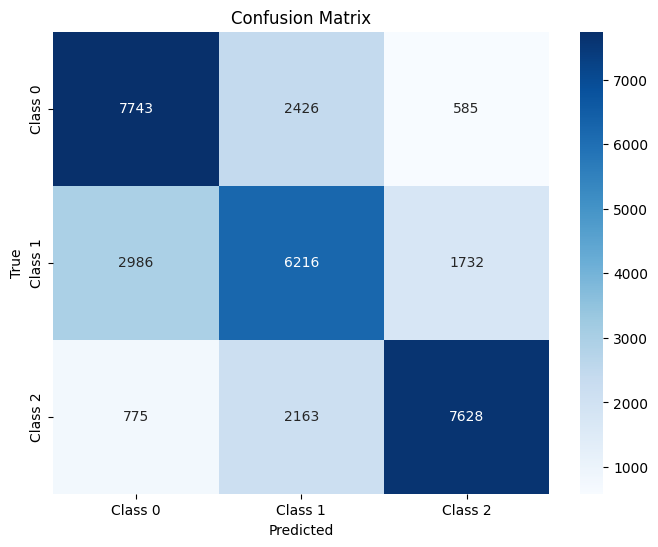

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


#y_pred = model.predict(X_test)
# y_pred_labels = np.argmax(y_pred_probs, axis=1)
# y_true_labels = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## my try

In [ ]:
try1 = 'a bad services'
try2 = ' good services and amazing people'

try1_cleaned = process_text(try1)
try2_cleaned = process_text(try2)


In [ ]:
try1_cleaned

['bad', 'service']

In [ ]:
try2_cleaned

['good', 'service', 'amazing', 'people']

In [ ]:
try1_cleaned = tokenizer.texts_to_sequences(try1_cleaned)
try2_cleaned = tokenizer.texts_to_sequences(try2_cleaned)

try1_cleaned = pad_sequences(try1_cleaned,maxlen=maxlen)
try2_cleaned = pad_sequences(try2_cleaned,maxlen=maxlen)


In [ ]:
y = model.predict(try1_cleaned)
y2 = model.predict(try2_cleaned)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [ ]:
y2 = np.argmax(y2, axis = 1)[0]

In [ ]:
y

np.int64(0)

In [ ]:
y2

np.int64(2)

# DATASET 2

## Load the dataset

In [ ]:
import pandas as pd

splits = {'train': 'train.csv', 'test': 'test.csv'}
dataset2 = pd.read_csv("hf://datasets/yassiracharki/Yelp_Reviews_for_Sentiment_Analysis_fine_grained_5_classes/" + splits["train"])

In [ ]:
dataset2

,class_index,review_text
0,5,dr. goldberg offers everything i look for in a...
1,2,"Unfortunately, the frustration of being Dr. Go..."
2,4,Been going to Dr. Goldberg for over 10 years. ...
3,4,Got a letter in the mail last week that said D...
4,1,I don't know what Dr. Goldberg was like before...
...,...,...
649995,5,I had a sprinkler that was gushing... pipe bro...
649996,1,Phone calls always go to voicemail and message...
649997,1,Looks like all of the good reviews have gone t...
649998,5,I was able to once again rely on Yelp to provi...


In [ ]:
dataset2.head()

,class_index,review_text
0,5,dr. goldberg offers everything i look for in a...
1,2,"Unfortunately, the frustration of being Dr. Go..."
2,4,Been going to Dr. Goldberg for over 10 years. ...
3,4,Got a letter in the mail last week that said D...
4,1,I don't know what Dr. Goldberg was like before...


## Check for cleaning data

In [ ]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650000 entries, 0 to 649999
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   class_index  650000 non-null  int64 
 1   review_text  650000 non-null  object
dtypes: int64(1), object(1)
memory usage: 9.9+ MB


In [ ]:
dataset2.isnull().sum()

,0
class_index,0
review_text,0


In [ ]:
dataset2.duplicated().sum()

np.int64(0)

In [ ]:
dataset2.class_index.value_counts()

,count
class_index,
5,130000
2,130000
4,130000
1,130000
3,130000


1+2 ------> Negative (0)                                                        
4+5 ------> Positive (1)

## Make labels

In [ ]:
def label_sentiment(rating):
    if rating in [1, 2]:
        return 0  # negative
    elif rating in [4, 5]:
        return 1  # positive

dataset2['label'] = dataset2['class_index'].apply(label_sentiment)

In [ ]:
dataset2.head()

,class_index,review_text,label
0,5,dr. goldberg offers everything i look for in a...,1.0
1,2,"Unfortunately, the frustration of being Dr. Go...",0.0
2,4,Been going to Dr. Goldberg for over 10 years. ...,1.0
3,4,Got a letter in the mail last week that said D...,1.0
4,1,I don't know what Dr. Goldberg was like before...,0.0


In [ ]:
dataset2.drop(columns = ['class_index'], inplace = True)

In [ ]:
dataset2.head()

,review_text,label
0,dr. goldberg offers everything i look for in a...,1.0
1,"Unfortunately, the frustration of being Dr. Go...",0.0
2,Been going to Dr. Goldberg for over 10 years. ...,1.0
3,Got a letter in the mail last week that said D...,1.0
4,I don't know what Dr. Goldberg was like before...,0.0


In [ ]:
dataset2.label.value_counts()

,count
label,
1.0,260000
0.0,260000


In [ ]:
dataset2.isnull().sum()

,0
review_text,0
label,130000


In [ ]:
dataset2.dropna(inplace = True)

In [ ]:
dataset2.isnull().sum()

,0
review_text,0
label,0


In [ ]:
dataset2.label.value_counts()

,count
label,
1.0,260000
0.0,260000


## EDA

class distribution in the dataset

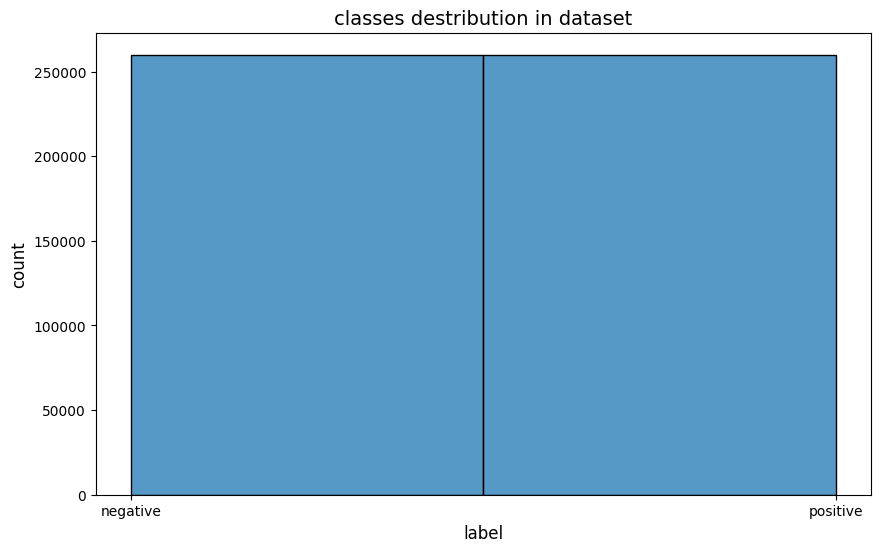

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data = dataset2, x = 'label', bins = 2)
plt.xticks(ticks=[0, 1], labels=['negative', 'positive'])


plt.title('classes destribution in dataset' , fontsize=14)
plt.xlabel('label', fontsize=12)
plt.ylabel('count', fontsize=12)


plt.show()


## preprocessing the text in the data:

In [ ]:
def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I) # Remove extra white space from text

    text = re.sub(r'\W', ' ', str(text)) # Remove all the special characters from text

    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # Remove all single characters from text

    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove any character that isn't alphabetical

    text = text.lower()

    words = word_tokenize(text)

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    stop_words = set(stopwords.words("english"))
    Words = [word for word in words if word not in stop_words]

    Words = [word for word in Words if len(word) >= 3]

    indices = np.unique(Words, return_index=True)[1]  #Sites of the first appearance of unique words in Words
    cleaned_text = np.array(Words)[np.sort(indices)].tolist()  # List of unique words sorted by first appearance

    return cleaned_text

In [ ]:
dataset2.columns

Index(['review_text', 'label'], dtype='object')

In [ ]:
x = dataset2.drop('label', axis =1)
y = dataset2['label']

In [ ]:
texts=list(x['review_text'])

In [ ]:
cleaned_text = [process_text(text) for text in texts]

In [ ]:
print(cleaned_text[:10])

[['goldberg', 'offer', 'everything', 'look', 'general', 'practitioner', 'nice', 'easy', 'talk', 'without', 'patronizing', 'always', 'time', 'seeing', 'patient', 'affiliated', 'top', 'notch', 'hospital', 'nyu', 'parent', 'explained', 'important', 'case', 'something', 'happens', 'need', 'surgery', 'get', 'referral', 'see', 'specialist', 'first', 'really', 'sitting', 'trying', 'think', 'complaint', 'drawing', 'blank'], ['unfortunately', 'frustration', 'goldberg', 'patient', 'repeat', 'experience', 'many', 'doctor', 'nyc', 'good', 'terrible', 'staff', 'seems', 'simply', 'never', 'answer', 'phone', 'usually', 'take', 'hour', 'repeated', 'calling', 'get', 'time', 'want', 'deal', 'run', 'problem', 'office', 'worker', 'medical', 'need', 'anyone', 'answering', 'incomprehensible', 'work', 'aggravation', 'regret', 'feel', 'give', 'star'], ['going', 'goldberg', 'year', 'think', 'one', 'patient', 'started', 'mhmg', 'great', 'really', 'big', 'picture', 'former', 'gyn', 'markoff', 'found', 'fibroid',

In [ ]:
empty = []
for i in range(len(cleaned_text)):
  if cleaned_text[i] == []:
    empty.append(i)
#print(empty)
print(len(empty))

77


In [ ]:
length = []
for i in range(len(cleaned_text)):
  length.append(len(cleaned_text[i]))

ds = pd.Series(length)
ds.value_counts()

,count
21,8045
23,7995
19,7970
26,7935
20,7932
...,...
371,1
403,1
388,1
362,1


<Axes: ylabel='Count'>

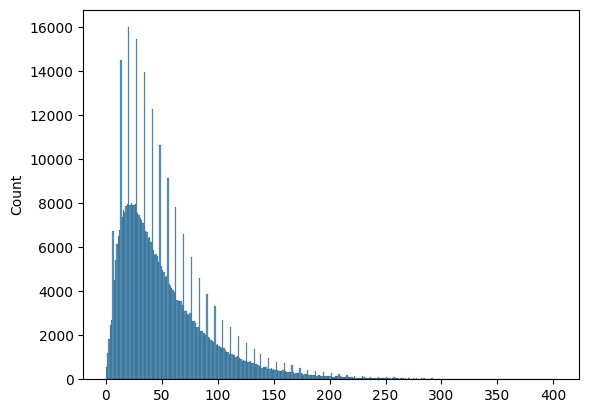

In [ ]:
sns.histplot(data = ds)

In [ ]:
x_temp, x_test, y_temp, y_test = train_test_split(cleaned_text, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.2, random_state=42)

In [ ]:
y_train.value_counts()

,count
label,
0.0,166420
1.0,166380


In [ ]:
y_val.value_counts()

,count
label,
1.0,41675
0.0,41525


In [ ]:
y_test.value_counts()

,count
label,
0.0,52055
1.0,51945


## prepare the data

In [ ]:
# convert words to sequence of numbers
max_vocab = 20000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(x_train)  # makes dictionary of the words and its number
word_idx = tokenizer.word_index  # Corrected syntax for accessing word index
v = len(word_idx) # may be greater than max_vocab
print("the size of vocab =", v)  # Corrected spacing
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)
x_val = tokenizer.texts_to_sequences(x_val)


the size of vocab = 154561


In [ ]:
# padding (make all sequences with the same length)
maxlen = 150
x_train = pad_sequences(x_train,maxlen=maxlen)
x_test = pad_sequences(x_test,maxlen=maxlen)
x_val = pad_sequences(x_val,maxlen=maxlen)

## Build LSTM model

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense,Input,Dropout
from tensorflow.keras.models import Model
from keras import optimizers
import numpy as np
D=150
inputt=Input(shape=(maxlen,))

In [ ]:
from tensorflow.keras.optimizers import Adam
learning_rate = 0.0001  # Set your desired learning rate here
x=Embedding(v+1,D)(inputt) # each word will be a vector of 100 numbers
x = Dropout(0.5)(x)
x = LSTM(150)(x)
x = Dense(32, activation='relu')(x)
x = Dense(2, activation='softmax')(x) # out

model2 = Model(inputt, x)

# Define optimizer with specified learning rate
optimizer = Adam(learning_rate=learning_rate)

model2.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history = model2.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping] )

Epoch 1/100
10400/10400 ━━━━━━━━━━━━━━━━━━━━ 6731s 647ms/step - accuracy: 0.8569 - loss: 0.3041 - val_accuracy: 0.9250 - val_loss: 0.1892
Epoch 2/100
10400/10400 ━━━━━━━━━━━━━━━━━━━━ 6397s 615ms/step - accuracy: 0.9271 - loss: 0.1837 - val_accuracy: 0.9269 - val_loss: 0.1828
Epoch 3/100
10400/10400 ━━━━━━━━━━━━━━━━━━━━ 6528s 623ms/step - accuracy: 0.9344 - loss: 0.1666 - val_accuracy: 0.9295 - val_loss: 0.1734
Epoch 4/100
10400/10400 ━━━━━━━━━━━━━━━━━━━━ 6411s 616ms/step - accuracy: 0.9399 - loss: 0.1533 - val_accuracy: 0.9319 - val_loss: 0.1713
Epoch 5/100
 8356/10400 ━━━━━━━━━━━━━━━━━━━━ 20:32 603ms/step - accuracy: 0.9439 - loss: 0.1419

In [ ]:
model.save('model2.h5')

In [ ]:
from google.colab import files
model.save('model1.keras')
files.download("model1.keras")

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes, target_names=['Negative', 'Neutral', 'Positive']))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


#y_pred = model.predict(X_test)
# y_pred_labels = np.argmax(y_pred_probs, axis=1)
# y_true_labels = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
